In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels import api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Индекс Hang Seng (HSI)

In [210]:
indexes = pd.read_excel('data.xlsx', sheet_name='static')
indexes = indexes.set_index("Dates")

In [211]:
indexes["HSI Index"]

Dates
1985-01-23     1357.84
1985-01-24     1384.87
1985-01-25     1373.91
1985-01-28     1374.89
1985-01-29     1338.87
                ...   
2025-01-17    19584.06
2025-01-20    19925.81
2025-01-21    20106.55
2025-01-22    19778.77
2025-01-23    19700.56
Name: HSI Index, Length: 10437, dtype: float64

In [212]:
indexes.describe()

,SPX Index,SX5E Index,UKX Index,DAX Index,CAC Index,NKY Index,HSI Index,AS51 Index,NIFTY Index
count,10079.000000,9809.000000,10123.000000,10109.000000,9529.000000,9827.000000,9876.000000,8268.000000,8352.000000
mean,1521.676880,2776.403735,5005.501395,6508.465467,4015.794064,18684.288694,15013.186374,4496.924599,5892.929474
std,1272.562597,1195.437731,1944.278784,4698.702530,1693.425084,7319.177238,8295.238449,1756.366283,5953.261343
min,176.530000,615.900000,1221.700000,820.300000,893.820000,7054.980000,1300.970000,1358.500000,279.020000
25%,474.150000,1627.220000,3221.550000,2151.720000,2442.460000,12972.640000,9009.910000,3028.945500,1123.800000
50%,1193.860000,2941.760000,5478.810000,5520.710000,4031.990000,17572.680000,15034.210000,4582.851000,4197.075000
75%,1989.415000,3604.820000,6551.105000,9772.670000,5217.590000,22498.840000,22091.750000,5811.360000,8565.137500
max,6090.270000,5464.430000,8559.560000,21318.520000,8239.990000,42224.020000,33154.120000,8495.217000,26216.050000


In [213]:
indexes.resample("Y").last().pct_change().multiply(100).round(2).tail(10)

C:\Users\ggwpn\AppData\Local\Temp\ipykernel_9272\1845223480.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  indexes.resample("Y").last().pct_change().multiply(100).round(2).tail(10)


,SPX Index,SX5E Index,UKX Index,DAX Index,CAC Index,NKY Index,HSI Index,AS51 Index,NIFTY Index
Dates,,,,,,,,,
2016-12-31,9.54,0.70,14.43,6.87,4.86,0.42,0.39,6.99,3.01
2017-12-31,19.42,6.49,7.63,12.51,9.26,19.10,35.99,7.05,28.65
2018-12-31,-6.24,-14.34,-12.48,-18.26,-10.95,-12.08,-13.61,-6.90,3.15
2019-12-31,28.88,24.78,12.10,25.48,26.37,18.20,9.07,18.38,12.02
2020-12-31,16.26,-5.14,-14.34,3.55,-7.14,16.01,-3.40,-1.45,14.90
2021-12-31,26.89,20.99,14.30,15.79,28.85,4.91,-14.08,13.02,24.12
2022-12-31,-19.44,-11.74,0.91,-12.35,-9.50,-9.37,-15.46,-5.45,4.33
2023-12-31,24.23,19.19,3.78,20.31,16.52,28.24,-13.82,7.84,20.03
2024-12-31,23.31,8.28,5.69,18.85,-2.15,19.22,17.67,7.49,8.80


<Axes: xlabel='Dates'>

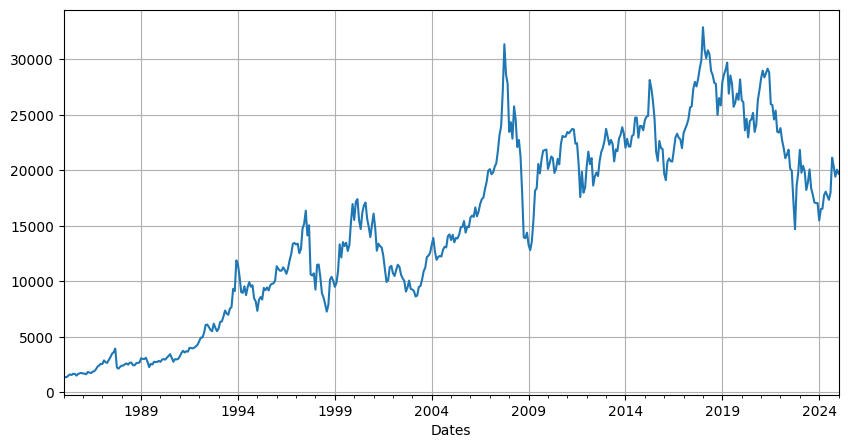

In [214]:
indexes["HSI Index"].resample("ME").last().plot(figsize=(10, 5), grid=1)

In [215]:
indexes["HSI Index"].resample("YE").last().pct_change(fill_method=None).describe()

count    40.000000
mean      0.100281
std       0.304278
min      -0.482700
25%      -0.116570
50%       0.049293
75%       0.295897
max       1.156667
Name: HSI Index, dtype: float64

### Макро показатели Китая

In [216]:
macro = pd.read_excel('Macro econ inputs.xlsx', sheet_name='China')
macro = macro.set_index("Dates")
macro.index = pd.to_datetime(macro.index)

rename_dict = {
    "CHLR12MC Index": "Policy Rate",
    "GTCNY2Y Govt": "2Y",
    "GTCNY10Y Govt": "10Y",
    "CNCPIYOY Index": "Inflation",
    "CHVAIOY Index": "Indu",
    "CNGDPC$Y Index": "GDP",
    "CNUESRU Index": "Urate",
    "EHBBCNY Index": "Budget balance",
    "CNFRBAL$ Index": "Trade Balance",
    "ECOXCNN Index": "Nominal GDP"
}
macro.rename(columns=rename_dict, inplace=True)

macro.describe()

,Policy Rate,2Y,10Y,Inflation,Indu,GDP,Urate,Budget balance,Trade Balance,Nominal GDP
count,33.000000,78.000000,78.000000,144.000000,144.000000,150.000000,38.000000,32.000000,148.000000,133.000000
mean,7.081818,2.552321,3.239231,3.550000,11.096528,8.907333,5.189474,-2.310938,22.168311,7211.399323
std,2.039803,0.745444,0.662362,5.288052,5.244903,3.433981,0.244717,1.606532,29.196302,6461.043383
min,4.350000,1.091000,1.648000,-2.100000,-1.100000,-6.800000,4.800000,-6.190000,-11.960000,490.780000
25%,5.810000,2.134500,2.834250,0.775000,6.775000,7.000000,5.000000,-3.682500,1.109500,1257.900000
50%,6.390000,2.475000,3.274000,1.900000,10.350000,8.900000,5.150000,-1.860000,8.965000,4891.240000
75%,7.920000,3.148500,3.624750,4.325000,14.950000,11.075000,5.200000,-1.097500,33.108750,12099.840000
max,12.060000,4.327000,4.576000,27.300000,26.900000,18.900000,5.900000,0.570000,114.188000,19521.390000


In [217]:
macro1 = macro[["Inflation", "Indu", "GDP", "Trade Balance", "Budget balance"]]
macro1.loc[:, "Budget balance"] = macro1["Budget balance"].ffill()
macro1 = macro1.dropna()
macro1

,Inflation,Indu,GDP,Trade Balance,Budget balance
Dates,,,,,
1993-12-31,18.8,25.2,13.9,-4.530,-0.83
1994-03-31,22.4,16.0,14.1,-0.236,-0.83
1994-06-30,22.6,15.1,13.7,1.042,-0.83
1994-09-30,27.3,21.8,13.5,1.274,-0.83
1994-12-31,25.5,18.5,13.0,0.566,-1.19
...,...,...,...,...,...
2024-12-31,0.1,6.2,5.0,105.176,-4.82
2025-03-31,-0.1,7.7,5.4,101.947,-4.82
2025-06-30,0.1,6.8,5.3,114.188,-4.82


In [218]:
hsi = indexes["HSI Index"].resample("QE").last().pct_change()
hsi

Dates
1985-03-31         NaN
1985-06-30    0.136443
1985-09-30   -0.037444
1985-12-31    0.159181
1986-03-31   -0.072190
                ...   
2024-03-31   -0.029680
2024-06-30    0.071166
2024-09-30    0.192739
2024-12-31   -0.050807
2025-03-31   -0.017916
Freq: QE-DEC, Name: HSI Index, Length: 161, dtype: float64

In [219]:
merged_data = pd.merge(macro1, hsi, on='Dates', how='inner').dropna()
X = merged_data[['Inflation', 'Indu', 'GDP', 'Trade Balance', 'Budget balance']]
y = merged_data['HSI Index']
X = sm.add_constant(X)

In [220]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HSI Index   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.927
Date:                Sun, 01 Feb 2026   Prob (F-statistic):             0.0947
Time:                        18:52:51   Log-Likelihood:                 90.054
No. Observations:                 126   AIC:                            -168.1
Df Residuals:                     120   BIC:                            -151.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0718      0.054     -1.340      0.183      -0.178       0.034
Inflation         -0.0022      0.002     -0.940      0.349      -0.007       0.002
Indu               0.0116      0.004      2.721      0.007       0.003       0.020
GDP               -0.0060      0.006     -1.097      0.275      -0.017       0.005
Trade Balance   3.264e-05      0.001      0.057      0.955      -0.001       0.001
Budget balance    -0.0080      0.010     -0.820      0.414      -0.027       0.011
==============================================================================
Omnibus:                       12.364   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.267
Skew:                           0.496   Prob(JB):                     0.000108
Kurtosis:                       4.579   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2 вариант

In [221]:
macro2 = macro[["Inflation", "Indu", "GDP", "Trade Balance", "Budget balance", "2Y", "10Y"]]
macro2.loc[:, "Budget balance"] = macro2["Budget balance"].ffill()
macro2 = macro2.dropna()
macro2

,Inflation,Indu,GDP,Trade Balance,Budget balance,2Y,10Y
Dates,,,,,,,
2005-12-31,1.6,16.5,11.4,11.016,-1.23,1.714,3.318
2006-12-31,2.8,14.7,12.7,20.997,-0.76,2.202,3.016
2007-03-31,3.3,17.6,13.8,6.871,-0.76,2.347,3.402
2007-06-30,4.4,19.4,14.4,26.910,-0.76,3.249,4.386
2007-09-30,6.2,18.9,14.4,23.806,-0.76,3.538,4.343
...,...,...,...,...,...,...,...
2024-12-31,0.1,6.2,5.0,105.176,-4.82,1.091,1.667
2025-03-31,-0.1,7.7,5.4,101.947,-4.82,1.497,1.812
2025-06-30,0.1,6.8,5.3,114.188,-4.82,1.363,1.648


In [222]:
merged_data = pd.merge(macro2, hsi, on='Dates', how='inner').dropna()
X = merged_data[["Inflation", "Indu", "GDP", "Trade Balance", "Budget balance", "2Y", "10Y"]]
y = merged_data['HSI Index']
X = sm.add_constant(X)

In [224]:
merged_data

,Inflation,Indu,GDP,Trade Balance,Budget balance,2Y,10Y,HSI Index
Dates,,,,,,,,
2005-12-31,1.6,16.5,11.4,11.016,-1.23,1.714,3.318,-0.035784
2006-12-31,2.8,14.7,12.7,20.997,-0.76,2.202,3.016,0.138042
2007-03-31,3.3,17.6,13.8,6.871,-0.76,2.347,3.402,-0.008204
2007-06-30,4.4,19.4,14.4,26.910,-0.76,3.249,4.386,0.099581
2007-09-30,6.2,18.9,14.4,23.806,-0.76,3.538,4.343,0.246627
...,...,...,...,...,...,...,...,...
2024-03-31,0.1,4.5,5.3,58.578,-4.47,1.903,2.289,-0.029680
2024-06-30,0.2,5.3,5.0,99.037,-4.47,1.644,2.204,0.071166
2024-09-30,0.4,5.4,4.8,81.757,-4.47,1.432,2.168,0.192739


In [223]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HSI Index   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.309
Date:                Sun, 01 Feb 2026   Prob (F-statistic):             0.0366
Time:                        18:52:51   Log-Likelihood:                 68.249
No. Observations:                  72   AIC:                            -120.5
Df Residuals:                      64   BIC:                            -102.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1410      0.144     -0.977      0.332      -0.430       0.147
Inflation         -0.0292      0.010     -3.047      0.003      -0.048      -0.010
Indu               0.0150      0.006      2.609      0.011       0.004       0.027
GDP               -0.0075      0.005     -1.424      0.159      -0.018       0.003
Trade Balance  -8.326e-05      0.001     -0.129      0.898      -0.001       0.001
Budget balance    -0.0089      0.010     -0.853      0.397      -0.030       0.012
2Y                 0.0190      0.041      0.466      0.643      -0.062       0.100
10Y                0.0189      0.059      0.321      0.749      -0.099       0.137
==============================================================================
Omnibus:                        3.864   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.224
Skew:                           0.509   Prob(JB):                        0.199
Kurtosis:                       3.197   Cond. No.                         627.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""